In [32]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import time
from sklearn.mixture import GaussianMixture as GMM

In [2]:
file = 'preped_som_rfls.pickle'

In [3]:
spectra = pickle.load(open(file, 'rb'))

In [4]:
spectra['20220224'].shape

(80, 100, 335)

In [5]:
time_1 = spectra['20220224'].copy()
time_1_reshaped = time_1.reshape(time_1.shape[0]*time_1.shape[1], time_1.shape[2])

In [143]:
start_time = time.time()
sum_sq_dist = []
seed = 8
k = range(1,15)
for i in k:
    kmeans = KMeans(init = 'k-means++', n_clusters = i, random_state = seed).fit(time_1_reshaped)
    sum_sq_dist.append(kmeans.inertia_)
    
print('-----%s seconds -----' % (time.time() - start_time))

-----14.784918069839478 seconds -----


<function matplotlib.pyplot.show(close=None, block=None)>

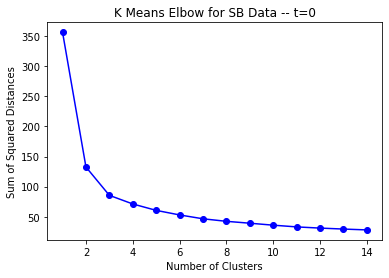

In [144]:
plt.plot(k, sum_sq_dist, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.title('K Means Elbow for SB Data -- t=0')
plt.show

In [8]:
print(spectra.keys())

dict_keys(['20220224', '20220228', '20220308', '20220316', '20220322', '20220405', '20220412', '20220420', '20220503', '20220511', '20220517', '20220529'])


In [26]:
spectra.keys()

dict_keys(['20220224', '20220228', '20220308', '20220316', '20220322', '20220405', '20220412', '20220420', '20220503', '20220511', '20220517', '20220529'])

In [ ]:
spectra

In [7]:
seed = 8
# Running kmeans through all time points in time series
labels = []
km_predict_tpoints = []
inits = []
count = 0
for i in spectra.keys():
    time_point = spectra[i].copy()
    time_point_reshapen = time_point.reshape(time_point.shape[0]*time_point.shape[1], time_point.shape[2])
    if i == '20220224':
        kmeans = KMeans(init = 'k-means++', n_clusters = 4, random_state = seed).fit(time_point_reshapen)
        Z = kmeans.predict(time_point_reshapen)
        clusterCount = np.bincount(kmeans.labels_)
        km_predict_tpoints.append(clusterCount)
        cluster_inits = kmeans.cluster_centers_
        inits.append(cluster_inits)
        labels.append(kmeans.labels_)
    else:
        #print('count: ', count)
        #print('inits: ', inits)
        kmeans = KMeans(init = inits[count-1], n_clusters = 4, random_state = seed).fit(time_point_reshapen)
        Z = kmeans.predict(time_point_reshapen)
        clusterCount = np.bincount(kmeans.labels_)
        km_predict_tpoints.append(clusterCount)
        cluster_inits = kmeans.cluster_centers_
        inits.append(cluster_inits)
        labels.append(kmeans.labels_)
        
    count+= 1

C:\Users\vpatro\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1146: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)
C:\Users\vpatro\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1146: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)
C:\Users\vpatro\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1146: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)
C:\Users\vpatro\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1146: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)
C:\Users\vpatro\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1146: RuntimeWarning: Explicit initial center position passed: perfor

In [8]:
len(inits)

12

Text(0.5, 1.0, 'Temporal Variation of Cluster 1')

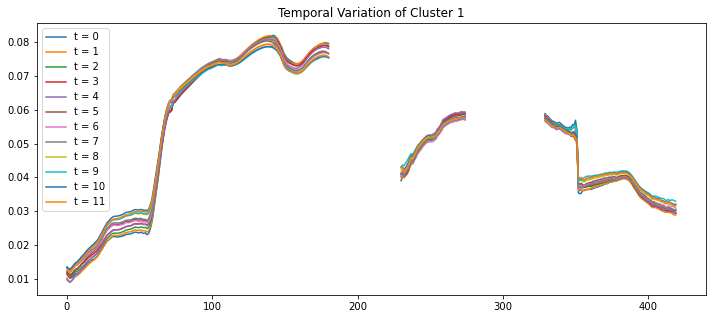

In [9]:
# plot center 1 over time

mean_1_display = np.empty((12,425))
mean_1_display[:] = np.nan

for i in range(len(inits)):
    mean_1_display[i, 0:181] = inits[i][0][0:181]
    mean_1_display[i, 230:275] = inits[i][0][188:233]
    mean_1_display[i, 329:420] = inits[i][0][233:324]
    
plt.figure(figsize = (12,5))
for i in range(mean_1_display.shape[0]):
    plt.plot(mean_1_display[i], label = 't = ' + str(i))
plt.legend()
plt.title('Temporal Variation of Cluster 1')

Text(0.5, 1.0, 'Temporal Variation of Cluster 2')

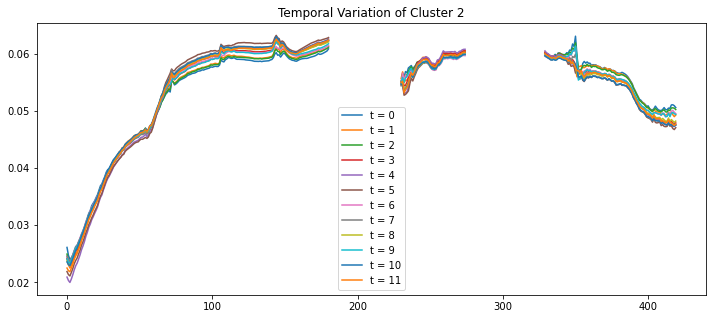

In [10]:
# plot center 1 over time

mean_2_display = np.empty((12,425))
mean_2_display[:] = np.nan

for i in range(len(inits)):
    mean_2_display[i, 0:181] = inits[i][1][0:181]
    mean_2_display[i, 230:275] = inits[i][1][188:233]
    mean_2_display[i, 329:420] = inits[i][1][233:324]
    
plt.figure(figsize = (12,5))
for i in range(mean_2_display.shape[0]):
    plt.plot(mean_2_display[i], label = 't = ' + str(i))
plt.legend()
plt.title('Temporal Variation of Cluster 2')

Text(0.5, 1.0, 'Temporal Variation of Cluster 3')

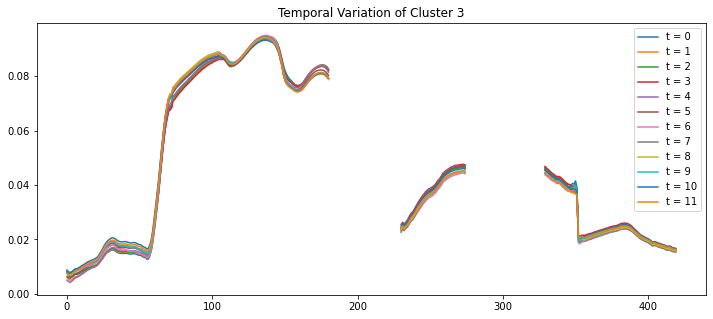

In [11]:
# plot center 1 over time

mean_3_display = np.empty((12,425))
mean_3_display[:] = np.nan

for i in range(len(inits)):
    mean_3_display[i, 0:181] = inits[i][2][0:181]
    mean_3_display[i, 230:275] = inits[i][2][188:233]
    mean_3_display[i, 329:420] = inits[i][2][233:324]
    
plt.figure(figsize = (12,5))
for i in range(mean_3_display.shape[0]):
    plt.plot(mean_3_display[i], label = 't = ' + str(i))
plt.legend()
plt.title('Temporal Variation of Cluster 3')

Text(0.5, 1.0, 'Temporal Variation of Cluster 4')

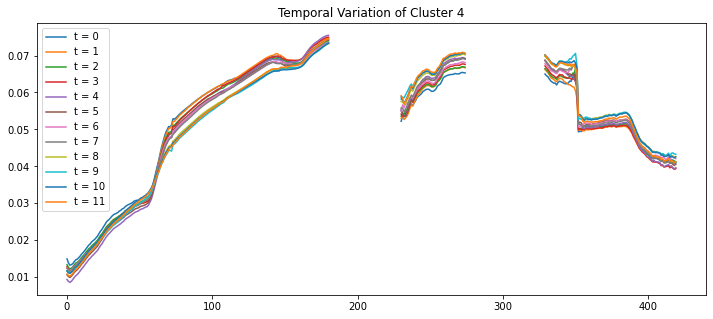

In [12]:
# plot center 1 over time

mean_4_display = np.empty((12,425))
mean_4_display[:] = np.nan

for i in range(len(inits)):
    mean_4_display[i, 0:181] = inits[i][3][0:181]
    mean_4_display[i, 230:275] = inits[i][3][188:233]
    mean_4_display[i, 329:420] = inits[i][3][233:324]
    
plt.figure(figsize = (12,5))
for i in range(mean_4_display.shape[0]):
    plt.plot(mean_4_display[i], label = 't = ' + str(i))
plt.legend()
plt.title('Temporal Variation of Cluster 4')

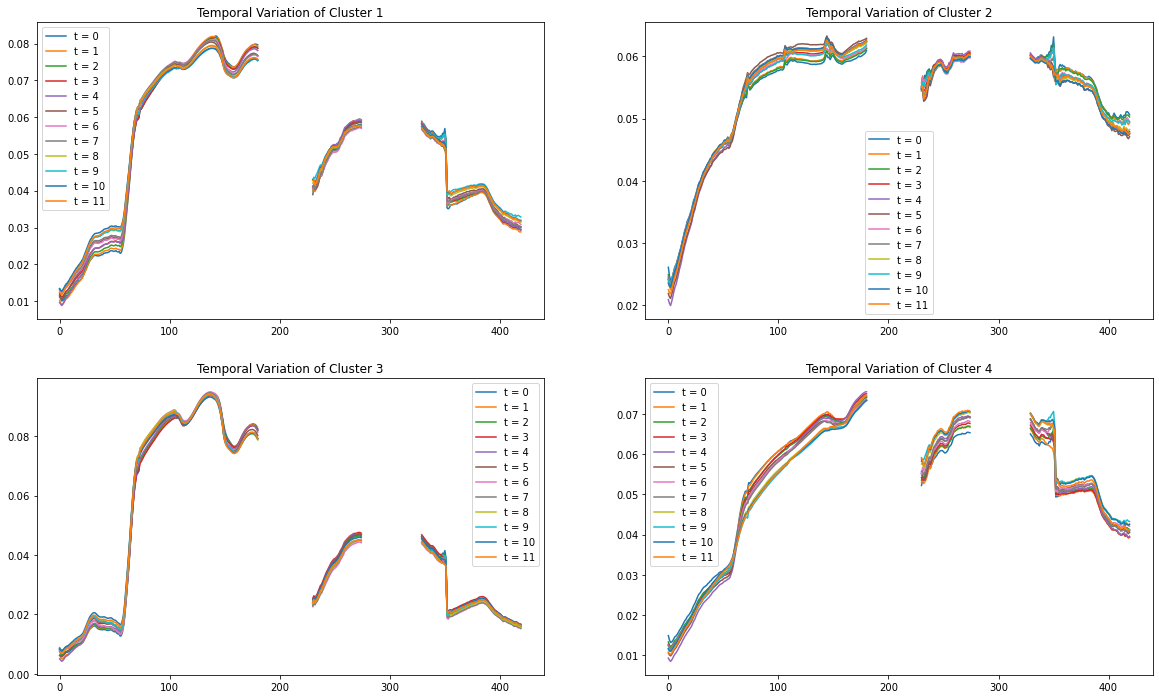

In [13]:
fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize = (20,12))
for i in range(4):
    if i == 0:
        # plot center 1 over time

        mean_1_display = np.empty((12,425))
        mean_1_display[:] = np.nan

        for i in range(len(inits)):
            mean_1_display[i, 0:181] = inits[i][0][0:181]
            mean_1_display[i, 230:275] = inits[i][0][188:233]
            mean_1_display[i, 329:420] = inits[i][0][233:324]

        for i in range(mean_1_display.shape[0]):
            axs[0,0].plot(mean_1_display[i], label = 't = ' + str(i))
        axs[0,0].legend()
        axs[0,0].set_title('Temporal Variation of Cluster 1')
        
    if i == 1:
        
        # plot center 2 over time

        mean_2_display = np.empty((12,425))
        mean_2_display[:] = np.nan

        for i in range(len(inits)):
            mean_2_display[i, 0:181] = inits[i][1][0:181]
            mean_2_display[i, 230:275] = inits[i][1][188:233]
            mean_2_display[i, 329:420] = inits[i][1][233:324]

        for i in range(mean_2_display.shape[0]):
            axs[0,1].plot(mean_2_display[i], label = 't = ' + str(i))
        axs[0,1].legend()
        axs[0,1].set_title('Temporal Variation of Cluster 2')
        
    if i == 2:
        
        mean_3_display = np.empty((12,425))
        mean_3_display[:] = np.nan

        for i in range(len(inits)):
            mean_3_display[i, 0:181] = inits[i][2][0:181]
            mean_3_display[i, 230:275] = inits[i][2][188:233]
            mean_3_display[i, 329:420] = inits[i][2][233:324]

        for i in range(mean_3_display.shape[0]):
            axs[1,0].plot(mean_3_display[i], label = 't = ' + str(i))
        axs[1,0].legend()
        axs[1,0].set_title('Temporal Variation of Cluster 3')
        
    if i == 3:
        mean_4_display = np.empty((12,425))
        mean_4_display[:] = np.nan

        for i in range(len(inits)):
            mean_4_display[i, 0:181] = inits[i][3][0:181]
            mean_4_display[i, 230:275] = inits[i][3][188:233]
            mean_4_display[i, 329:420] = inits[i][3][233:324]

        for i in range(mean_4_display.shape[0]):
            axs[1,1].plot(mean_4_display[i], label = 't = ' + str(i))
        axs[1,1].legend()
        axs[1,1].set_title('Temporal Variation of Cluster 4')
        
        
        

Spectral shapes:

Cluster 1: darker vegetation

Cluster 2: Soils plus artificial surfaces, soil + buildings

Cluster 3: Greener, brighter vegetation; healthier surface with more chlorophyll and liquid water content

Cluster 4: soil + dry, dead vegetation, potentially mixed soil including non-photosynthetic vegetation

In [14]:
mean_1 = []
mean_2 = []
mean_3 = []
mean_4 = []

for i in range(mean_1_display.shape[0]):
    mean_1.append(mean_1_display[i])
    mean_2.append(mean_2_display[i])
    mean_3.append(mean_3_display[i])
    mean_4.append(mean_4_display[i])
    

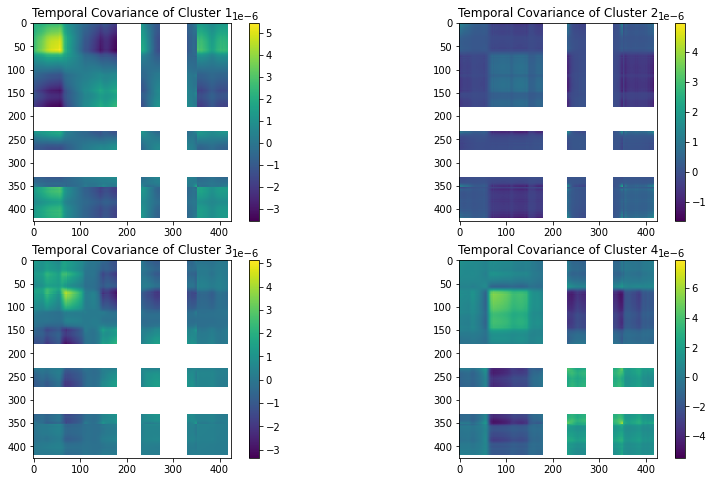

In [15]:
fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize = (14,8))
for i in range(4):
    if i == 0:
        
        mean_1 = np.array(mean_1)
        Cov_1 = np.cov(mean_1, rowvar = False)
        im = axs[0,0].imshow(Cov_1)
        plt.colorbar(im, ax = axs[0,0])
        axs[0,0].set_title('Temporal Covariance of Cluster 1')
        
    if i == 1:
        
        mean_2 = np.array(mean_2)
        Cov_2 = np.cov(mean_2, rowvar = False)
        im = axs[0,1].imshow(Cov_2)
        plt.colorbar(im, ax = axs[0,1])
        axs[0,1].set_title('Temporal Covariance of Cluster 2')
        
    if i == 2:
        
        mean_3 = np.array(mean_3)
        Cov_3 = np.cov(mean_3, rowvar = False)
        im = axs[1,0].imshow(Cov_3)
        plt.colorbar(im, ax = axs[1,0])
        axs[1,0].set_title('Temporal Covariance of Cluster 3')
        
    if i == 3:
        
        mean_4 = np.array(mean_4)
        Cov_4 = np.cov(mean_4, rowvar = False)
        im = axs[1,1].imshow(Cov_4)
        plt.colorbar(im, ax = axs[1,1])
        axs[1,1].set_title('Temporal Covariance of Cluster 4')

In [16]:
len(inits)

12

In [17]:
final_clusters = []
final_clusters.append(mean_1_display[11])
final_clusters.append(mean_2_display[11])
final_clusters.append(mean_3_display[11])
final_clusters.append(mean_4_display[11])

Text(0.5, 1.0, 'Clusters for Final Time Point (t = 11)')

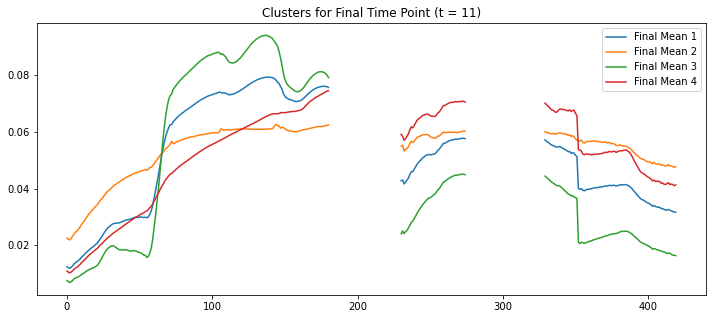

In [18]:
plt.figure(figsize = (12,5))
for i in range(len(final_clusters)):
    plt.plot(final_clusters[i], label = 'Final Mean ' + str(i+1))
plt.legend()
plt.title('Clusters for Final Time Point (t = 11)')

In [19]:
km_predict_tpoints

[array([1819, 2892, 1556, 1733], dtype=int64),
 array([1728, 3092, 1430, 1750], dtype=int64),
 array([1756, 3081, 1403, 1760], dtype=int64),
 array([1815, 3217, 1405, 1563], dtype=int64),
 array([1878, 3333, 1362, 1427], dtype=int64),
 array([1886, 3159, 1547, 1408], dtype=int64),
 array([1853, 3106, 1450, 1591], dtype=int64),
 array([1845, 3180, 1453, 1522], dtype=int64),
 array([1841, 3130, 1558, 1471], dtype=int64),
 array([1895, 3121, 1591, 1393], dtype=int64),
 array([1914, 3191, 1512, 1383], dtype=int64),
 array([1823, 3222, 1614, 1341], dtype=int64)]

In [20]:
t_1 = []
t_2 = []
t_3 = []
t_4 = []


for i in range(len(km_predict_tpoints)):
    t_1.append(km_predict_tpoints[i][0])
    t_2.append(km_predict_tpoints[i][1])
    t_3.append(km_predict_tpoints[i][2])
    t_4.append(km_predict_tpoints[i][3])

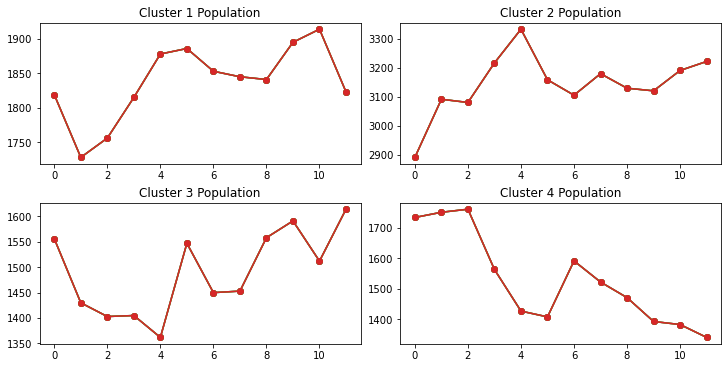

In [21]:
t = range(0,12)
fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize = (10,5), constrained_layout = True)
for i in range(4):
    axs[0,0].plot(t, t_1, marker = 'o')
    axs[0,0].set_title('Cluster 1 Population')
    axs[0,1].plot(t, t_2, marker = 'o')
    axs[0,1].set_title('Cluster 2 Population')
    axs[1,0].plot(t, t_3, marker = 'o')
    axs[1,0].set_title('Cluster 3 Population')
    axs[1,1].plot(t, t_4, marker = 'o')
    axs[1,1].set_title('Cluster 4 Population')


    

In [22]:
image_0 = spectra['20220224'].copy()

In [23]:
image_0.shape

(80, 100, 335)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


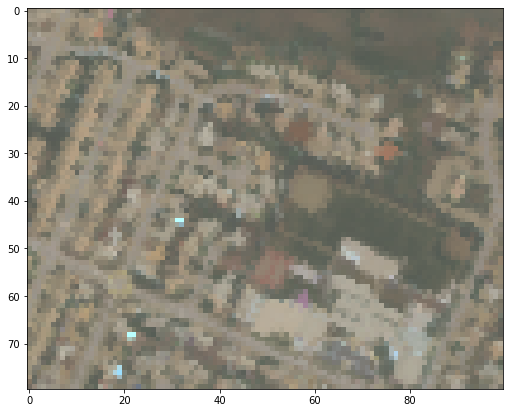

In [35]:
fig = plt.figure(figsize = (12, 7))
r = image_0[:,:,54]
g = image_0[:,:,34]
b = image_0[:,:,16]
img = np.dstack((r, g, b))*10
plt.imshow(img);

z = np.ones((image_0.shape[0], image_0.shape[1]))
img = np.dstack((z, z, z))
plt.imshow(img, alpha = 0.3)

In [25]:
color_1 = (255,0,0)
color_2 = (0,255,0)
color_3 = (0,0,255)
color_4 = (255,255,225)

In [26]:
colored_assignments = np.zeros((12,8000,3)) 
for i in range(len(labels)): # 12 times
    assignments = labels[i].copy() # 8000 elements
    for j in range(assignments.shape[0]):
        if assignments[j] == 0:
            colored_assignments[i][j] = color_1
        elif assignments[j] == 1:
            colored_assignments[i][j] = color_2
        elif assignments[j] == 2:
            colored_assignments[i][j] = color_3
        else:
            colored_assignments[i][j] = color_4
        

In [27]:
reshaped = colored_assignments[0].reshape((80,100,3)).copy()

In [28]:
np.bincount(labels[0])

array([1819, 2892, 1556, 1733], dtype=int64)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


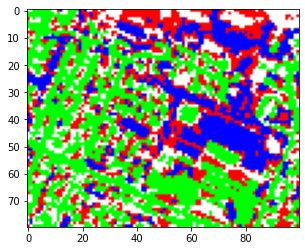

In [29]:
plt.imshow(reshaped)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

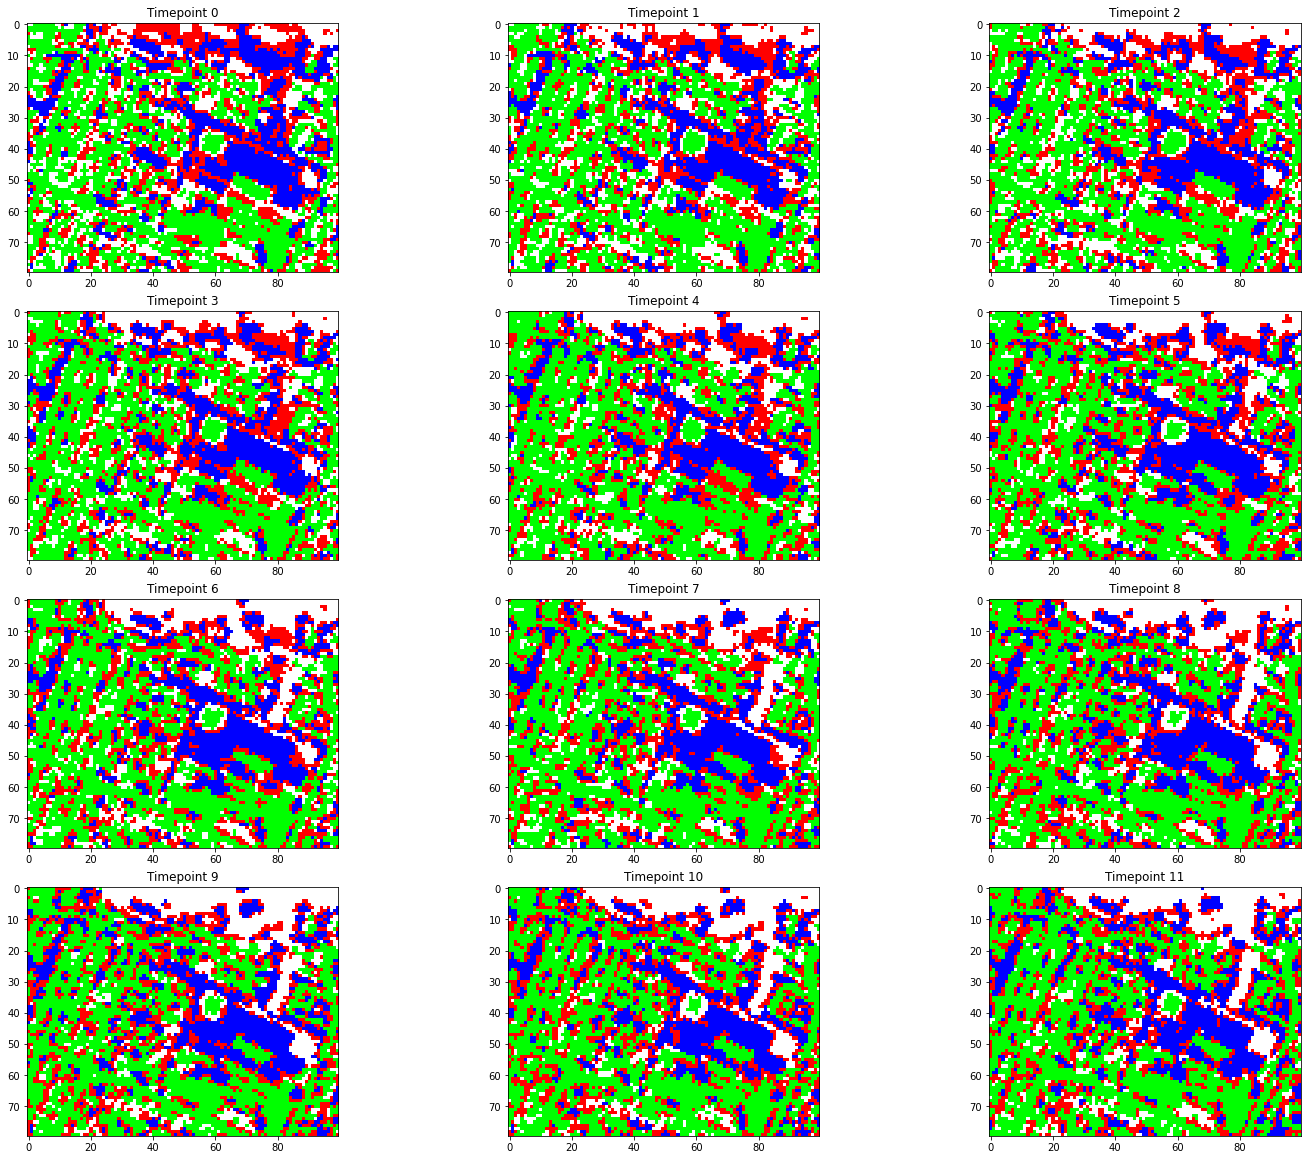

In [33]:
fig, axs = plt.subplots(nrows = 4, ncols = 3, figsize = (20,16), constrained_layout = True)

row = 0
col = 0
for i in range(colored_assignments.shape[0]):
    if col == 3:
        row += 1
        col = 0
    img = colored_assignments[i].reshape((80,100,3)).copy()
    axs[row,col].imshow(img)
    axs[row,col].set_title('Timepoint ' + str(i))
    col+= 1
    

Spectral shapes:

Cluster 1 (RED): darker vegetation

Cluster 2 (GREEN): Soils plus artificial surfaces, soil + buildings

Cluster 3 (BLUE): Greener, brighter vegetation; healthier surface with more chlorophyll and liquid water content

Cluster 4 (WHITE): soil + dry, dead vegetation, potentially mixed soil including non-photosynthetic vegetation

In [39]:
spectra.keys()

dict_keys(['20220224', '20220228', '20220308', '20220316', '20220322', '20220405', '20220412', '20220420', '20220503', '20220511', '20220517', '20220529'])

In [41]:
combined = np.concatenate((spectra['20220224'], spectra['20220228'], spectra['20220308'], spectra['20220316'], spectra['20220322'], spectra['20220405'], \
                          spectra['20220412'], spectra['20220420'], spectra['20220503'], spectra['20220511'], spectra['20220517'], spectra['20220529']))

In [42]:
combined.shape

(960, 100, 335)

In [45]:
combined_reshaped = combined.reshape((combined.shape[0]*combined.shape[1], combined.shape[2]))

In [77]:
start_time = time.time()
sum_sq_dist = []
seed = 8
k = range(2,14)
for i in k:
    kmeans = KMeans(init = 'k-means++', n_clusters = i, random_state = seed).fit(combined_reshaped)
    sum_sq_dist.append(kmeans.inertia_)
    
print('-----%s seconds -----' % (time.time() - start_time))

-----301.279757976532 seconds -----


<function matplotlib.pyplot.show(close=None, block=None)>

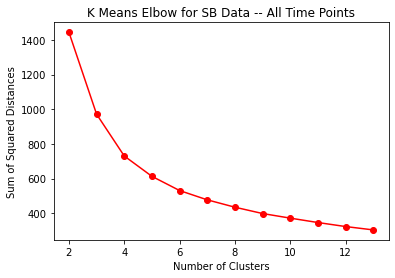

In [78]:
plt.plot(k, sum_sq_dist, 'ro-')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.title('K Means Elbow for SB Data -- All Time Points')
plt.show

In [54]:
t_11 = spectra['20220529'].copy()
t_11_reshaped = t_11.reshape((t_11.shape[0]*t_11.shape[1], t_11.shape[2]))

t_5 = spectra['20220405'].copy()
t_5_reshaped = t_5.reshape((t_5.shape[0]*t_5.shape[1], t_5.shape[2]))

t_0 = spectra['20220224'].copy()
t_0_reshaped = t_0.reshape((t_0.shape[0]*t_0.shape[1], t_0.shape[2]))

In [56]:
tpoints = [t_0_reshaped, t_5_reshaped, t_11_reshaped]
start_time = time.time()
inertia_vals = []
seed = 8
k = range(2,14)
for a in range(3):
    to_use = tpoints[a]
    sum_d_sq = []
    for i in k:
        kmeans = KMeans(init = 'k-means++', n_clusters = i, random_state = seed).fit(to_use)
        sum_d_sq.append(kmeans.inertia_)
    inertia_vals.append(sum_d_sq)
    
print('-----%s seconds -----' % (time.time() - start_time))

-----72.50492525100708 seconds -----


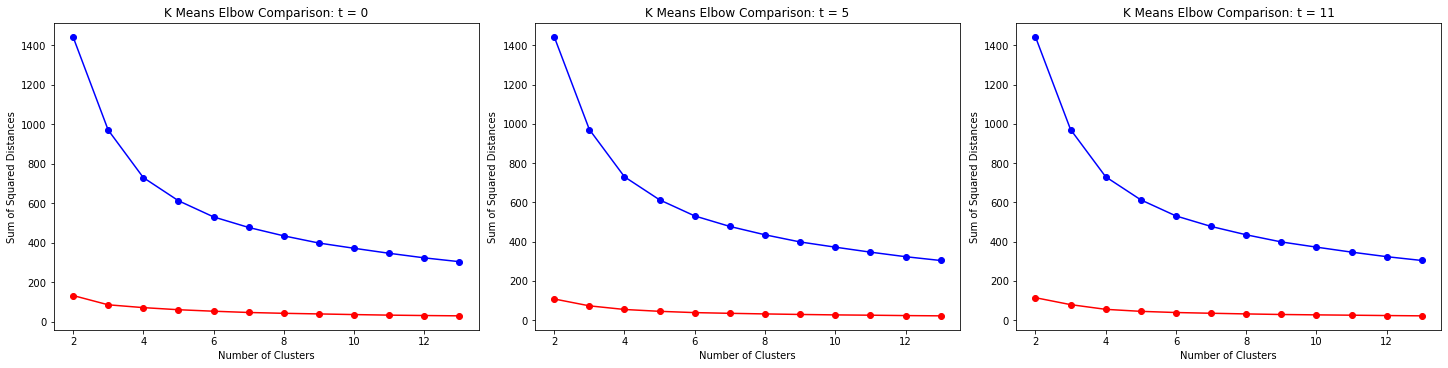

In [85]:
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (20,5), constrained_layout = True)
for i in range(3):
    axs[i].plot(k, np.array(inertia_vals[i]), 'ro-')
    axs[i].plot(k, sum_sq_dist, 'bo-')
    axs[i].set_xlabel('Number of Clusters')
    axs[i].set_ylabel('Sum of Squared Distances')
    if i == 0:
        axs[0].set_title('K Means Elbow Comparison: t = 0')
    elif i == 1:
        axs[1].set_title('K Means Elbow Comparison: t = 5')
    else:
        axs[2].set_title('K Means Elbow Comparison: t = 11')


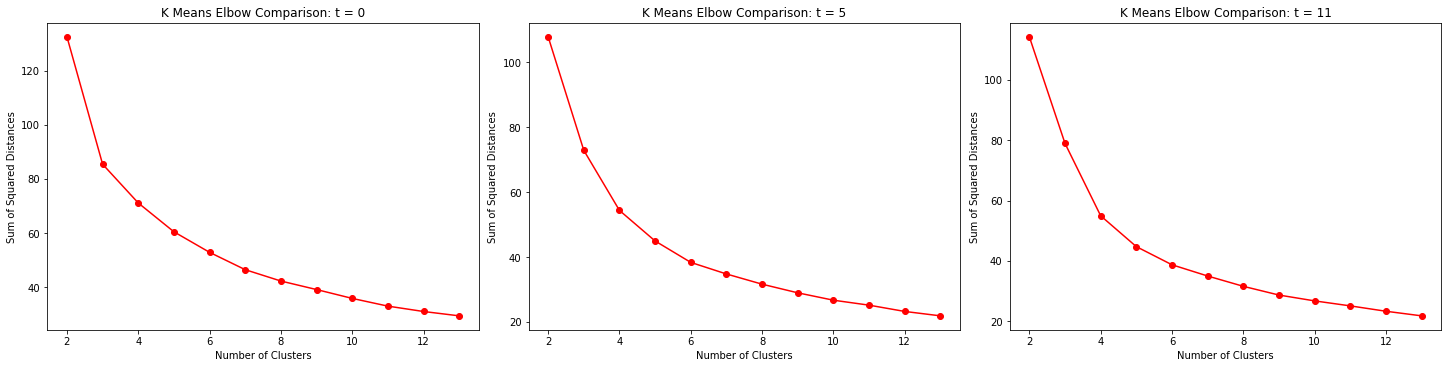

In [86]:
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (20,5), constrained_layout = True)
for i in range(3):
    axs[i].plot(k, np.array(inertia_vals[i]), 'ro-')
    #axs[i].plot(k, sum_sq_dist, 'bo-')
    axs[i].set_xlabel('Number of Clusters')
    axs[i].set_ylabel('Sum of Squared Distances')
    if i == 0:
        axs[0].set_title('K Means Elbow Comparison: t = 0')
    elif i == 1:
        axs[1].set_title('K Means Elbow Comparison: t = 5')
    else:
        axs[2].set_title('K Means Elbow Comparison: t = 11')


In [88]:
combined_reshaped.shape

(96000, 335)

In [90]:
seed = 8

kmeans = KMeans(init = 'k-means++', n_clusters = 7, random_state = seed).fit(combined_reshaped)

In [131]:
Z = kmeans.predict(combined_reshaped)
clusterCount = np.bincount(kmeans.labels_)
print(clusterCount)

[22499 12697 11165 13426 10087 11565 14561]


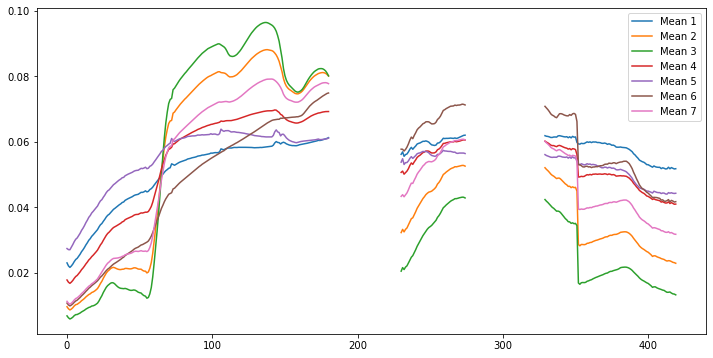

In [133]:
cluster_inits = kmeans.cluster_centers_
mean_display = np.empty((7, 425))
mean_display[:] = np.nan

plt.figure(figsize = (12,6))
for i in range(7):
    mean_display[i, 0:181] = cluster_inits[i][0:181]
    mean_display[i, 230:275] = cluster_inits[i][188:233]
    mean_display[i, 329:420] = cluster_inits[i][233:324]
    plt.plot(mean_display[i], label = 'Mean ' + str(i+1))
plt.legend()


In [109]:
color_5 = (0, 255, 255) # teal
color_6 = (255, 0, 255)
color_7 = (255, 255, 0)

In [101]:
kmeans.labels_.shape

(96000,)

In [127]:
assignments = kmeans.labels_.copy()
print(assignments.shape)
assignments_reshapen = assignments.reshape((12,8000))
print(assignments_reshapen.shape)

(96000,)
(12, 8000)


In [128]:
colored_assignments = np.zeros((12,8000,3)) 
for i in range(assignments_reshapen.shape[0]): # 12 times
    for j in range(assignments_reshapen.shape[1]): # 8000 times
        if assignments_reshapen[i][j] == 0:
            colored_assignments[i][j] = color_1
        elif assignments_reshapen[i][j] == 1:
            colored_assignments[i][j] = color_2
        elif assignments_reshapen[i][j] == 2:
            colored_assignments[i][j] = color_3
        elif assignments_reshapen[i][j] == 3:
            colored_assignments[i][j] = color_4
        elif assignments_reshapen[i][j] == 4:
            colored_assignments[i][j] = color_5
        elif assignments_reshapen[i][j] == 5:
            colored_assignments[i][j] = color_6
        else:
            colored_assignments[i][j] = color_7
        

In [129]:
clustered_images = []
for i in range(12):
    im = colored_assignments[i].copy()
    im = im.reshape((80,100,3))
    clustered_images.append(im)

clustered_images = np.array(clustered_images)
clustered_images_reshapen = clustered_images.reshape((4,3,80,100,3))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

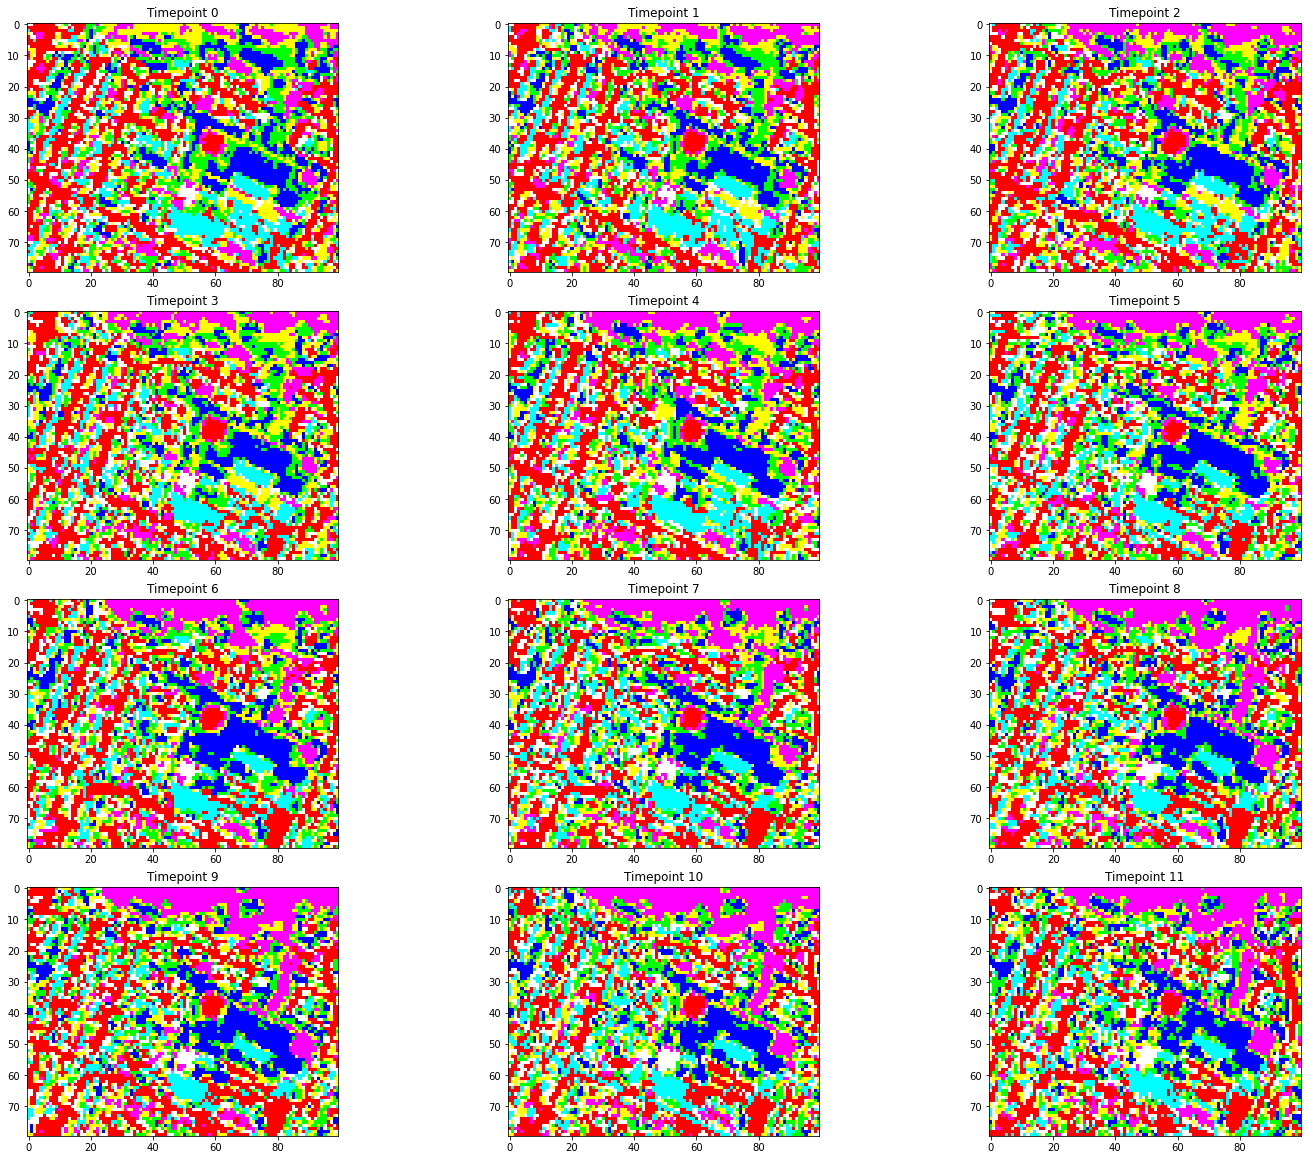

In [130]:
fig, axs = plt.subplots(nrows = 4, ncols = 3, figsize = (20,16), constrained_layout = True)

row = 0
col = 0
for i in range(colored_assignments.shape[0]):
    if col == 3:
        row += 1
        col = 0
    img = clustered_images_reshapen[row,col].reshape((80,100,3)).copy()
    axs[row,col].imshow(img)
    axs[row,col].set_title('Timepoint ' + str(i))
    col+= 1
    